In [3]:
from sklearn.datasets import make_circles
import numpy as np
from matplotlib import pyplot as plt
from numpy import tanh
from sklearn.model_selection import train_test_split

In [35]:
# activation function 1
def sigmoid(z):
    return 1.0/(1+np.exp(-z))
# activation function 2
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z),axis=1,keepdims=True)

class MultilayerPerceptron:
    
    def __init__(self,X,Y,hidden_layers):
        np.random.seed(0)
        weights = {}
        bias= {} 
        layers = [X.shape[1]]+hidden_layers+[len(np.unique(Y))]
        ## One Hot Matrix
        Y_=np.zeros((Y.shape[0],len(np.unique(Y))) )
        Y_[np.arange(Y.shape[0]),Y]=1
        
        for i in range(len(layers)-1):
            #W=np.random.randn(layers[i],layers[i+1])
            W=np.random.uniform(low=-0.5, high=0.5, size=(layers[i],layers[i+1]))
            #b=np.random.randn(1,layers[i+1])
            b=np.random.uniform(low=-0.5, high=0.5, size=(1,layers[i+1]))
            weights[i]=W
            bias[i]=b
        
        self.X=X
        self.Y=Y_
        self.weights=weights
        self.bias=bias
        self.no_of_layers=len(layers)
        self.cost=[]
    
    def forwardPropagation(self,X):
        activations={}
        Z={}
        activations[0]=X
        n=self.no_of_layers
        for i in range(1,n):
            Z[i] = np.dot(activations[i-1],self.weights[i-1]) + self.bias[i-1]
            if i<n-1:
                activations[i]=tanh(Z[i])
            else:
                activations[n-1]=softmax(Z[i])
        return activations
    
    def backPropagation(self,activations,learning_rate):
        l=self.no_of_layers-1
        m=self.X.shape[0]

        delta={}
        gradW={}
        gradB={}

        delta[l]=activations[l]-self.Y
        gradW[l-1]=np.dot(activations[l-1].T,delta[l])/m
        gradB[l-1]=np.sum(delta[l],axis=0)/m
        
        for i in range(l-1,0,-1):
            delta[i]=np.dot(delta[i+1],self.weights[i].T)*(1-np.square(activations[i])) # tanh derivative= 1-tanh^2
            gradW[i-1]=np.dot(activations[i-1].T,delta[i])/m
            gradB[i-1]=np.sum(delta[i],axis=0)/m

        for i in range(0,l-1):   
            self.weights[i]=self.weights[i]-learning_rate*gradW[i]
            self.bias[i][0]=self.bias[i][0]-learning_rate*gradB[i]   
        
    def fit(self,learning_rate=0.0001,max_epochs=2000):
        j=0
        for i in range(max_epochs):
            activations=self.forwardPropagation(self.X)
            self.backPropagation(activations,learning_rate)
            
            self.cost.append(self.loss(self.Y, activations[self.no_of_layers-1]))   
            
    def score(self,X,Y):
        activations=self.forwardPropagation(X)
        Y_pred=activations[self.no_of_layers-1]  
        return np.sum(Y==np.argmax(Y_pred,axis=1))/X.shape[0]
    
    def predict(self,X):
        act=self.forwardPropagation(X)
        pred=act[self.no_of_layers-1]
        return np.argmax(pred,axis=1)
    
    def loss(self,Y,prob):
        return -np.mean(Y*np.log(prob))

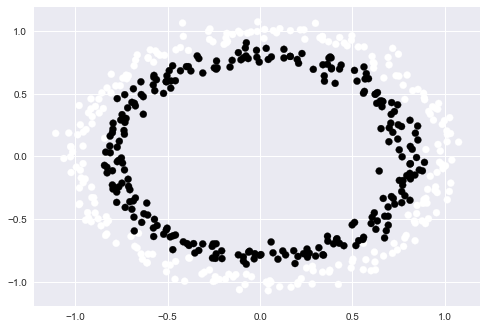

In [80]:
X,Y=make_circles(n_samples=500,shuffle=True,noise=0.05,random_state=7,factor=0.8)
plt.scatter(X[:,0],X[:,1],c=Y)
XTrain,XTest,YTrain,YTest=train_test_split(X,Y,test_size=0.05)

In [86]:
mlp=MultilayerPerceptron(X,Y,[10,5])
mlp.fit(max_epochs=4000,learning_rate=0.8)

In [87]:
mlp.score(XTest,YTest)

1.0

In [88]:
mlp.predict(X[4:7])

array([1, 0, 0])

In [89]:
losses=mlp.cost

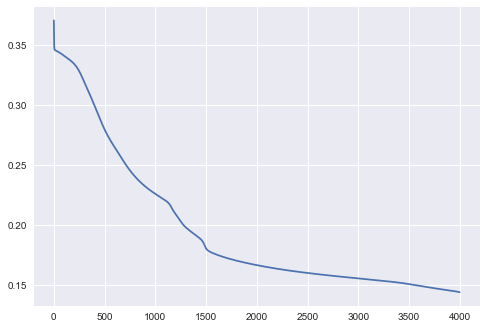

In [90]:
plt.plot(losses)
plt.show()

In [91]:
from visualize import plot_decision_boundary

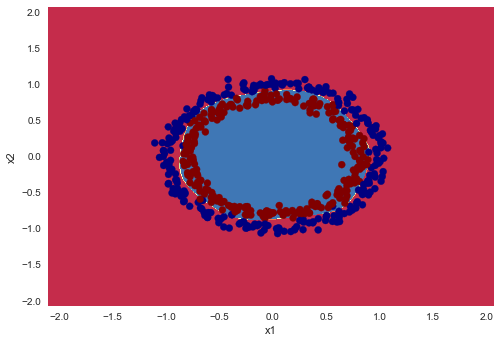

In [92]:
plot_decision_boundary(lambda X:mlp.predict(X),X,Y)

In [47]:
from sklearn.datasets import make_moons,make_circles,make_classification

def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

In [74]:
datasets = ["xor","classification","moons","circles"]
for dataset in datasets:
    X,Y = load_dataset(dataset)
    mlp=MultilayerPerceptron(X,Y,[8,8,8,8])
    mlp.fit(max_epochs=4000,learning_rate=0.8)
    print(mlp.score(X,Y)*100)

100.0
96.6
98.4
97.8
